In [32]:
import pandas as pd
import seaborn as sns
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("data/frontier_2023.csv")

In [41]:
df

,expected_return,risk,sharpe_ratio,team_players
0,60.500740,20.878722,2.897722,"Patrick Mahomes, Travis Etienne, Kenneth Walke..."
1,56.100116,17.924293,3.129837,"Trevor Lawrence, Jonathan Ward, Jamaal William..."
2,41.023251,18.060345,2.271454,"Lamar Jackson, D'Ernest Johnson, Damien Willia..."
3,69.960637,19.664281,3.557752,"Derek Carr, D'Ernest Johnson, Rachaad White, J..."
4,41.916210,16.446334,2.548666,"Joe Burrow, Tony Jones, James Cook, Greg Dortc..."
...,...,...,...,...
9995,32.679347,16.484959,1.982374,"Logan Woodside, Dare Ogunbowale, Alvin Kamara,..."
9996,54.943307,19.242868,2.855256,"Carson Wentz, Miles Sanders, Latavius Murray, ..."
9997,47.760726,16.997093,2.809935,"Derek Carr, D'Andre Swift, David Montgomery, V..."
9998,36.126073,14.946485,2.417028,"Sam Howell, Najee Harris, Gary Brightwell, All..."


In [50]:
good_df = df[df["sharpe_ratio"] >= 3.0]
# good_df = good_df[good_df["sharpe_ratio"] <= 2.8]
good_df

,expected_return,risk,sharpe_ratio,team_players
1,56.100116,17.924293,3.129837,"Trevor Lawrence, Jonathan Ward, Jamaal William..."
3,69.960637,19.664281,3.557752,"Derek Carr, D'Ernest Johnson, Rachaad White, J..."
24,70.830232,21.385203,3.312114,"Kyler Murray, Jamycal Hasty, Josh Jacobs, Terr..."
33,64.564008,21.417183,3.014589,"Deshaun Watson, Isiah Pacheco, Kenneth Gainwel..."
55,65.787637,21.702010,3.031407,"Patrick Mahomes, Keaontay Ingram, Latavius Mur..."
...,...,...,...,...
9887,58.168804,18.928066,3.073151,"Andy Dalton, Zonovan Knight, Josh Jacobs, Rash..."
9916,60.613754,20.162466,3.006267,"Kirk Cousins, Jamycal Hasty, James Cook, Chris..."
9943,51.696480,16.826299,3.072362,"Matthew Stafford, Jake Funk, Kenneth Walker, T..."
9986,60.368627,19.557744,3.086687,"Ryan Tannehill, Latavius Murray, D'Ernest John..."


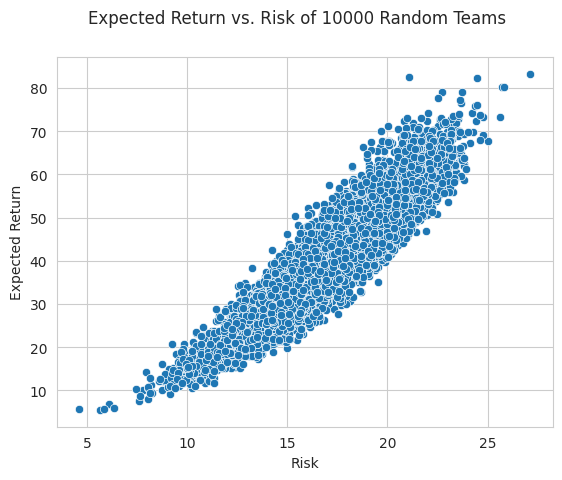

In [50]:
x = "risk"
y = "expected_return"
with sns.axes_style("whitegrid"):
    sns.scatterplot(data=df, x=x, y=y)
    plt.suptitle("Expected Return vs. Risk of 10000 Random Teams")
    plt.ylabel("Expected Return")
    plt.xlabel("Risk")
    plt.savefig("./imgs/frontier_2023.png")

<Axes: xlabel='sharpe_ratio', ylabel='Count'>

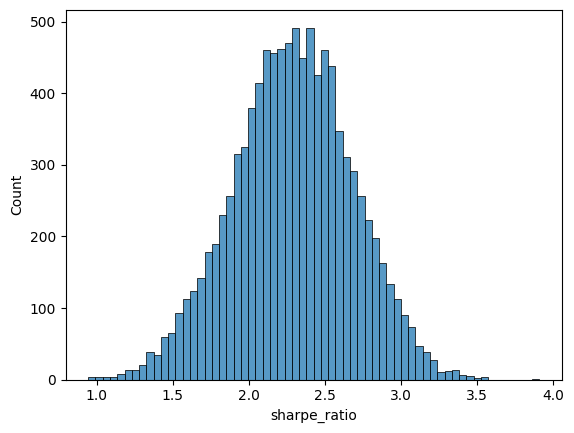

In [33]:
sns.histplot(data=df, x=x)

In [2]:
uds_df = pd.read_csv("data/simulation_results_uncertainty_2023.csv")

In [3]:
uds_df

,trial,user_pick,team_players,expected_return,risk,sharpe_ratio,wins,losses,total_points,average_points,std
0,0.0,2.0,"Josh Allen, Najee Harris, Jonathan Taylor, Mil...",91.123142,23.404497,3.893403,5.0,13.0,1236.840000,68.713333,26.157807
1,1.0,4.0,"Austin Ekeler, Josh Allen, Najee Harris, Miles...",83.834619,22.372905,3.747150,10.0,8.0,1522.340000,84.574444,21.520053
2,2.0,2.0,"Josh Allen, Josh Jacobs, Najee Harris, Miles S...",90.174390,23.280208,3.873436,8.0,10.0,1415.039995,78.613333,20.950485
3,3.0,9.0,"CeeDee Lamb, Patrick Mahomes, Travis Etienne, ...",83.594197,22.980104,3.637677,12.0,6.0,1844.300002,102.461111,22.508909
4,4.0,9.0,"CeeDee Lamb, Patrick Mahomes, Travis Etienne, ...",86.496348,23.318913,3.709279,12.0,6.0,1936.319997,107.573333,20.523083
...,...,...,...,...,...,...,...,...,...,...,...
95,95.0,9.0,"CeeDee Lamb, Patrick Mahomes, Travis Etienne, ...",78.931131,21.653817,3.645137,14.0,4.0,1767.800000,98.211111,13.451246
96,96.0,3.0,"Patrick Mahomes, Najee Harris, Tee Higgins, Mi...",78.988396,23.129571,3.415039,9.0,9.0,1138.720002,63.262222,16.790427
97,97.0,9.0,"CeeDee Lamb, Patrick Mahomes, Travis Etienne, ...",78.931131,21.653817,3.645137,17.0,1.0,1767.800000,98.211111,13.451246
98,98.0,2.0,"Josh Allen, Najee Harris, Rhamondre Stevenson,...",86.625694,22.233629,3.896156,6.0,12.0,1226.140000,68.118889,21.661925


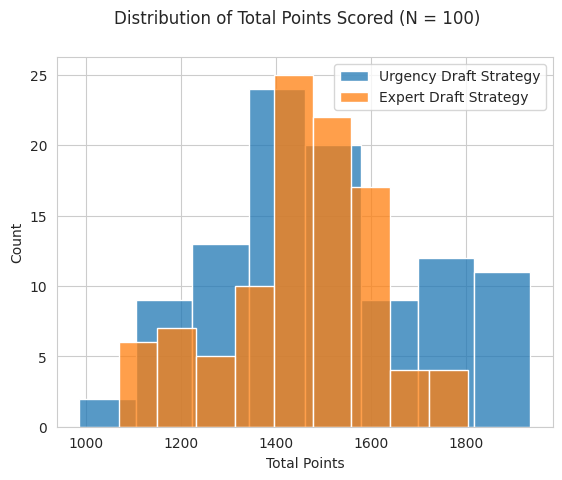

In [51]:
with sns.axes_style("whitegrid"):
    sns.histplot(uds_df["total_points"])
    sns.histplot(eds_df["total_points"])
    plt.suptitle("Distribution of Total Points Scored (N = 100)")
    plt.xlabel("Total Points")
    plt.legend(["Urgency Draft Strategy", "Expert Draft Strategy"])
    plt.savefig("./imgs/draft_strategy_dists_2023.png")

In [5]:
eds_df = pd.read_csv("data/simulation_results_uncertaint_2023.csv")

In [20]:
eds_df["total_points"].describe()

count     100.000000
mean     1454.252799
std       160.957577
min      1067.899999
25%      1367.269999
50%      1466.730001
75%      1560.185000
max      1804.020000
Name: total_points, dtype: float64

In [11]:
eds_df["wins"].describe()

count    100.000000
mean       9.140000
std        2.745133
min        3.000000
25%        7.000000
50%        9.000000
75%       11.000000
max       16.000000
Name: wins, dtype: float64

In [12]:
m1 = 9.6
m2 = 9.14
s1 = 3.440695
s2 = 2.745133
m = 100
n = 100
v1 = np.power(s1, 2)
v2 = np.power(s2, 2)
s1_norm = v1 / (m*(m - 1))
s2_norm = v1 / (n*(n - 1))
s1_vnorm = (1 / np.power(m - 1, 3)) * np.power(v1 / m, 2)
s2_vnorm = (1 / np.power(n - 1, 3)) * np.power(v2 / n, 2)
v = np.power(s1_norm + s2_norm, 2) / (s1_vnorm + s2_vnorm)
t = (m1 - m2) / np.sqrt(s1_norm + s2_norm)

In [13]:
t

np.float64(9.406200997990696)

In [14]:
v

np.float64(281.81052691208254)

In [18]:
1 - sp.stats.t.cdf(t, v)

np.float64(0.0)

In [19]:
sp.stats.t.sf(t, v)

np.float64(9.395274197847917e-19)